In [37]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

In [38]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


### Importando Base

In [39]:
df = pd.read_csv("Bases/base_nao_nula.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [40]:
# Converter todas as colunas para categóricas
df = df.astype('category')

# Lista das colunas que devem ser numéricas
colunas_numericas = [
'E01602', 'E017', 'P00104', 'P00404'
]

# Converter as colunas selecionadas para numéricas
df[colunas_numericas] = df[colunas_numericas].astype('float')

### Verificando valores nulos

In [41]:
#função para exibir o valor de valores nulos em cada coluna
def exibir_colunas_com_valores_nulos(df):
        
    # Calcula o número de valores nulos em cada coluna
    valores_nulos_por_coluna = df.isnull().sum()
    
    # Filtra as colunas com mais de 3000 valores nulos
    colunas_com_menos_de_700_nulos = valores_nulos_por_coluna[valores_nulos_por_coluna >= 0]
    
    # Exibe o total de valores nulos para as colunas que têm mais de 3000 valores nulos
    print("Total de valores nulos para as colunas com valores nulos:")

In [42]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:


### Verificando tamanho da base

In [43]:
df.shape

(33321, 48)

In [44]:
df.columns

Index(['C006', 'M01401', 'M01501', 'E01602', 'VDF001', 'E017', 'D00901',
       'Q092', 'A001', 'A002010', 'A003010', 'A004010', 'J007', 'Q11006',
       'N00101', 'P034', 'P027', 'J01101', 'J014', 'N010', 'N011', 'N012',
       'N013', 'N014', 'N015', 'N016', 'N017', 'N018', 'P00104', 'P00404',
       'J001', 'J00101', 'J002', 'P006', 'P00901', 'P01101', 'P013', 'P015',
       'P02001', 'P01601', 'P018', 'P02002', 'P023', 'P02501', 'P02602',
       'P02601', 'E001', 'P050'],
      dtype='object')

### Iniciando tratamento dos outliers

#### Separando valores de colunas numericas, para visualizar graficamente

In [65]:
# Contar valores em 'E01602'
valores_salario = df['E01602'].value_counts()
valores_peso = df['P00104'].value_counts()
valores_altura = df['P00404'].value_counts()

#### PLot dos Graficos

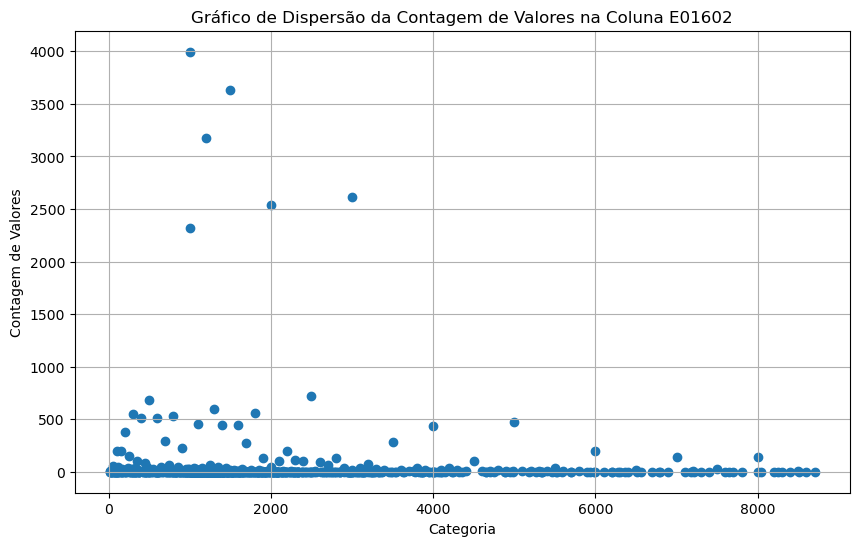

In [66]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_salario.index, valores_salario.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

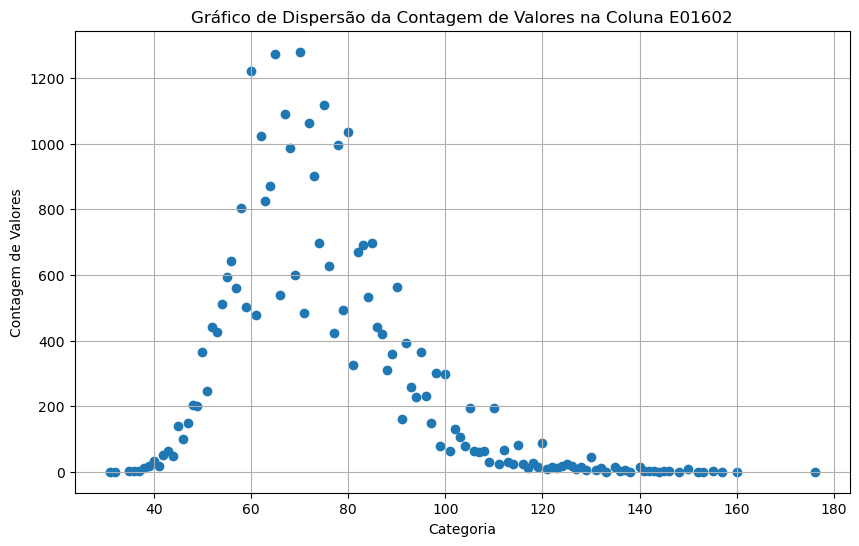

In [47]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_peso.index, valores_peso.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

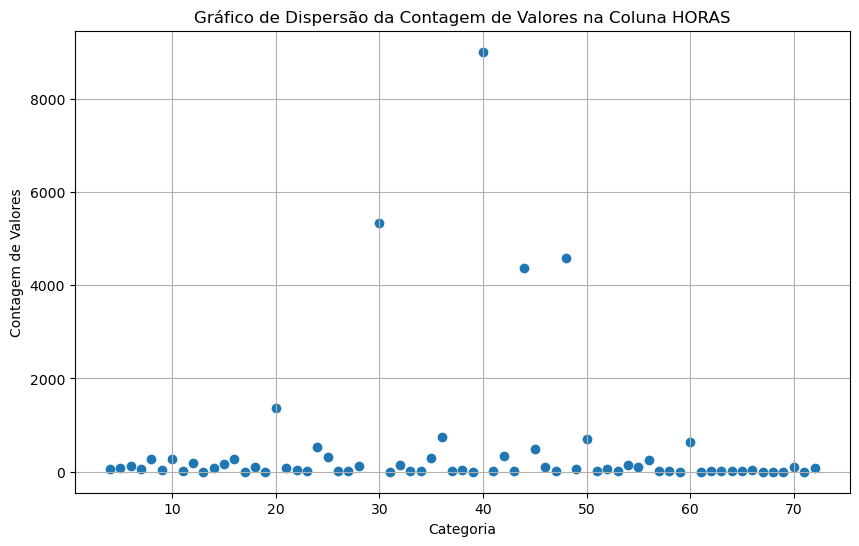

In [67]:
valores_hr_job = df['E017'].value_counts()
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_hr_job.index, valores_hr_job.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna HORAS')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

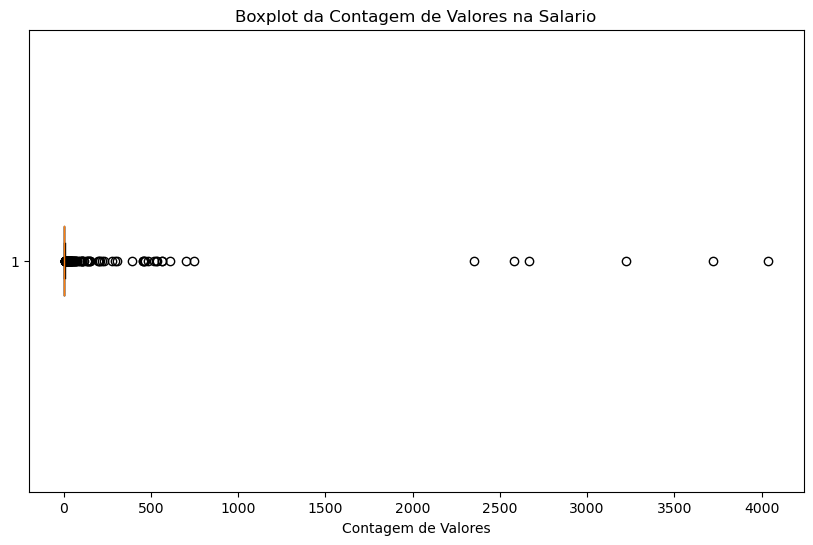

In [49]:
# Contar valores em 'E01602'
value_counts = df['E01602'].value_counts()
# Criar um boxplot para verificar outliers
plt.figure(figsize=(10, 6))
plt.boxplot(value_counts, vert=False)

plt.xlabel('Contagem de Valores')
plt.title('Boxplot da Contagem de Valores na Salario')
plt.show()

In [68]:
df.columns

Index(['C006', 'M01401', 'M01501', 'E01602', 'VDF001', 'E017', 'D00901',
       'Q092', 'A001', 'A002010', 'A003010', 'A004010', 'J007', 'Q11006',
       'N00101', 'P034', 'P027', 'J01101', 'J014', 'N010', 'N011', 'N012',
       'N013', 'N014', 'N015', 'N016', 'N017', 'N018', 'J001', 'J00101',
       'J002', 'P006', 'P00901', 'P01101', 'P013', 'P015', 'P02001', 'P01601',
       'P018', 'P02002', 'P023', 'P02501', 'P02602', 'P02601', 'E001', 'P050',
       'IMC'],
      dtype='object')

### Setando os metodos utilizados

#### Usando o Z_scores

In [51]:
def deleta_outliers_dvp(df, column, threshold=3):
  z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
  df = df[z_scores < threshold]
  return df

#### Usando o metodo de tukey para as colunas de salario e horas trabalhadas

In [52]:
df = deleta_outliers_dvp(df,'E01602')

In [53]:
df = deleta_outliers_dvp(df,'E017')

#### Usando o metodo de Z-Scores para as colunas de Peso e Altura

In [54]:
df = deleta_outliers_dvp(df, 'P00104')

In [55]:
df = deleta_outliers_dvp(df, 'P00404')

In [56]:
#verificando tamanho da base
df.shape

(32080, 48)

### Criando Coluna de IMC 

In [57]:
#calculando 
df['P00404'] = df['P00404']/100
df['IMC'] = df['P00104']/(df['P00404'] * df['P00404'])

print(df['IMC'])

0        17.755682
1        24.654832
2        27.041644
3        27.041644
4        20.438166
           ...    
33316    20.199470
33317    22.720438
33318    33.333333
33319    32.744928
33320    17.921147
Name: IMC, Length: 32080, dtype: float64


In [58]:
df.drop(columns=['P00104'], inplace=True)
df.drop(columns=['P00404'], inplace=True)

In [69]:
df.columns

Index(['C006', 'M01401', 'M01501', 'E01602', 'VDF001', 'E017', 'D00901',
       'Q092', 'A001', 'A002010', 'A003010', 'A004010', 'J007', 'Q11006',
       'N00101', 'P034', 'P027', 'J01101', 'J014', 'N010', 'N011', 'N012',
       'N013', 'N014', 'N015', 'N016', 'N017', 'N018', 'J001', 'J00101',
       'J002', 'P006', 'P00901', 'P01101', 'P013', 'P015', 'P02001', 'P01601',
       'P018', 'P02002', 'P023', 'P02501', 'P02602', 'P02601', 'E001', 'P050',
       'IMC'],
      dtype='object')

In [60]:
df.to_csv("base_sem_outliers.csv")